In [1]:
import numpy as np
import scipy.interpolate as ip
import matplotlib.pyplot as plt

# Paramaterised isoscalar/isovector coefficients

S00_129 = np.array([0.0547144,-0.146407,0.180603,-0.125526,0.0521484,-0.0126363,0.00176284,-0.000132501,0.00000423423,-0.00000000168052])

S11_min_129 = np.array([0.0221559,-0.06561,0.086392,-0.0631729,0.0278792,-0.00756661,0.00126767,-0.000127755,0.00000710322,-0.000000167272])

S11_max_129 = np.array([0.0357742,-0.107895,0.145055,-0.108549,0.0490401,-0.0136169,0.00233283,-0.000239926,0.0000135553,-0.000000321404])

S01_min_129 = np.array([-0.0885644,0.254049,-0.332322,0.244981,-0.109298,0.0296705,-0.00492657,0.000488467,-0.0000265022,0.000000598909])

S01_max_129 = np.array([-0.0696691,0.19738,-0.254839,0.185896,-0.0825294,0.0224322,-0.00375109,0.000377179,-0.000020951,0.000000492362])

In [2]:
S00_131 = np.array([0.0417857,-0.111132,0.171306,-0.132481,0.0630161,-0.0177684,0.00282192,-0.000232247,0.00000781471,0.00000000125984])

S11_min_131 = np.array([0.0167361,-0.0472853,0.0684924,-0.0514413,0.0237858,-0.00692778,0.0012437,-0.000131617,0.00000746669,-0.000000173484])

S11_max_131 = np.array([0.0271052,-0.0812985,0.12296,-0.0940491,0.0439746,-0.0128013,0.00227407,-0.000235642,0.0000128691,-0.000000277011])

S01_min_131 = np.array([-0.0675438,0.19571,-0.306688,0.243678,-0.118395,0.0351428,-0.00622577,0.000631685,-0.0000333272,0.0000006825])

S01_max_131 = np.array([-0.0529487,0.146987,-0.225003,0.179499,-0.0888278,0.0271514,-0.0049928,0.000531148,-0.0000299162,0.000000681902])

In [3]:
# READ DATA
folder_path = '/Users/Robert/digitised_data/'

file_names_129 = ['129_p_min.csv','129_p_max.csv','129_n_min.csv','129_n_max.csv']
file_names_131 = ['131_p_min.csv','131_p_max.csv','131_n_min.csv','131_n_max.csv']

up_129_min, Sp_129_min = np.loadtxt(folder_path+file_names_129[0],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
up_129_max, Sp_129_max = np.loadtxt(folder_path+file_names_129[1],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_129_min, Sn_129_min = np.loadtxt(folder_path+file_names_129[2],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_129_max, Sn_129_max = np.loadtxt(folder_path+file_names_129[3],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)

up_131_min, Sp_131_min = np.loadtxt(folder_path+file_names_131[0],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
up_131_max, Sp_131_max = np.loadtxt(folder_path+file_names_131[1],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_131_min, Sn_131_min = np.loadtxt(folder_path+file_names_131[2],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)
un_131_max, Sn_131_max = np.loadtxt(folder_path+file_names_131[3],dtype='double,double',delimiter=',',usecols=(0,1),unpack=True)

Sp_129_min_data = zip(up_129_min, Sp_129_min)
Sp_129_min_data = np.array(sorted(Sp_129_min_data, key=lambda x:x[0])) #sort the arrays by first column
Sp_129_max_data = zip(up_129_max, Sp_129_max)
Sp_129_max_data = np.array(sorted(Sp_129_max_data, key=lambda x:x[0]))
Sn_129_min_data = zip(un_129_min, Sn_129_min)
Sn_129_min_data = np.array(sorted(Sn_129_min_data, key=lambda x:x[0]))
Sn_129_max_data = zip(un_129_max, Sn_129_max)
Sn_129_max_data = np.array(sorted(Sn_129_max_data, key=lambda x:x[0]))

Sp_131_min_data = zip(up_131_min, Sp_131_min)
Sp_131_min_data = np.array(sorted(Sp_131_min_data, key=lambda x:x[0])) #sort the arrays by first column
Sp_131_max_data = zip(up_131_max, Sp_131_max)
Sp_131_max_data = np.array(sorted(Sp_131_max_data, key=lambda x:x[0]))
Sn_131_min_data = zip(un_131_min, Sn_131_min)
Sn_131_min_data = np.array(sorted(Sn_131_min_data, key=lambda x:x[0]))
Sn_131_max_data = zip(un_131_max, Sn_131_max)
Sn_131_max_data = np.array(sorted(Sn_131_max_data, key=lambda x:x[0]))

In [4]:
umin = 0.1
umax = 9.9

u_eval = np.arange(umin,umax,0.1)

In [5]:
# Polynomial definition

def S_Function(u, par):
    poly = 0
    parlength = len(par)
    for index in range(parlength):
        poly = poly + np.exp(-u) * par[index] * pow(u, index)
    return poly

In [6]:
# CREATE INTERPOLATED MEAN FUNCTION
Sfn_p_129_min_data = ip.interp1d(Sp_129_min_data[:,0],Sp_129_min_data[:,1],kind='cubic')
Sfn_p_129_max_data = ip.interp1d(Sp_129_max_data[:,0],Sp_129_max_data[:,1],kind='cubic')
Sfn_n_129_min_data = ip.interp1d(Sn_129_min_data[:,0],Sn_129_min_data[:,1],kind='cubic')
Sfn_n_129_max_data = ip.interp1d(Sn_129_max_data[:,0],Sn_129_max_data[:,1],kind='cubic')

Sfn_p_131_min_data = ip.interp1d(Sp_131_min_data[:,0],Sp_131_min_data[:,1],kind='cubic')
Sfn_p_131_max_data = ip.interp1d(Sp_131_max_data[:,0],Sp_131_max_data[:,1],kind='cubic')
Sfn_n_131_min_data = ip.interp1d(Sn_131_min_data[:,0],Sn_131_min_data[:,1],kind='cubic')
Sfn_n_131_max_data = ip.interp1d(Sn_131_max_data[:,0],Sn_131_max_data[:,1],kind='cubic')

In [7]:
# Evaluate function for proton/neutron case using isoscalar/isovector functions and definition

Sfn_p_129_min_paper = S_Function(u_eval, S00_129) + S_Function(u_eval, S01_min_129) + S_Function(u_eval, S11_min_129)
Sfn_p_129_max_paper = S_Function(u_eval, S00_129) + S_Function(u_eval, S01_max_129) + S_Function(u_eval, S11_max_129)

Sfn_n_129_min_paper = S_Function(u_eval, S00_129) - S_Function(u_eval, S01_max_129) + S_Function(u_eval, S11_min_129)
Sfn_n_129_max_paper = S_Function(u_eval, S00_129) - S_Function(u_eval, S01_min_129) + S_Function(u_eval, S11_max_129)

Sfn_p_131_min_paper = S_Function(u_eval, S00_131) + S_Function(u_eval, S01_min_131) + S_Function(u_eval, S11_min_131)
Sfn_p_131_max_paper = S_Function(u_eval, S00_131) + S_Function(u_eval, S01_max_131) + S_Function(u_eval, S11_max_131)

Sfn_n_131_min_paper = S_Function(u_eval, S00_131) - S_Function(u_eval, S01_max_131) + S_Function(u_eval, S11_min_131)
Sfn_n_131_max_paper = S_Function(u_eval, S00_131) - S_Function(u_eval, S01_min_131) + S_Function(u_eval, S11_max_131)

In [8]:
Sfn_p_129_interp_paper = 0.5 * (Sfn_p_129_min_paper + Sfn_p_129_max_paper)

# Evaluate function for proton/neutron case using digitised plot data

Sfn_p_129_interp_data = 0.5 * (Sfn_p_129_min_data(u_eval) + Sfn_p_129_max_data(u_eval))

frac_diff = (Sfn_p_129_interp_data - Sfn_p_129_interp_paper)/Sfn_p_129_interp_paper

fig1 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{p}(u)$(digitised) - $S_{p}(u)$(paramaterised)) / $S_{p}(u)$(paramaterised)')
plt.title('Xe-129')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

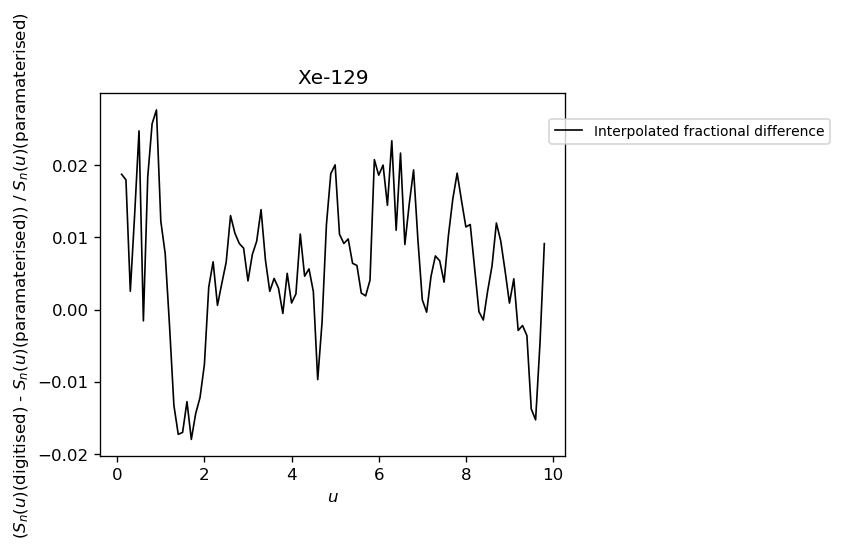

In [9]:
Sfn_n_129_interp_paper = 0.5 * (Sfn_n_129_min_paper + Sfn_n_129_max_paper)

Sfn_n_129_interp_data = 0.5 * (Sfn_n_129_min_data(u_eval) + Sfn_n_129_max_data(u_eval))

frac_diff = (Sfn_n_129_interp_data - Sfn_n_129_interp_paper)/Sfn_n_129_interp_paper

fig2 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{n}(u)$(digitised) - $S_{n}(u)$(paramaterised)) / $S_{n}(u)$(paramaterised)')
plt.title('Xe-129')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

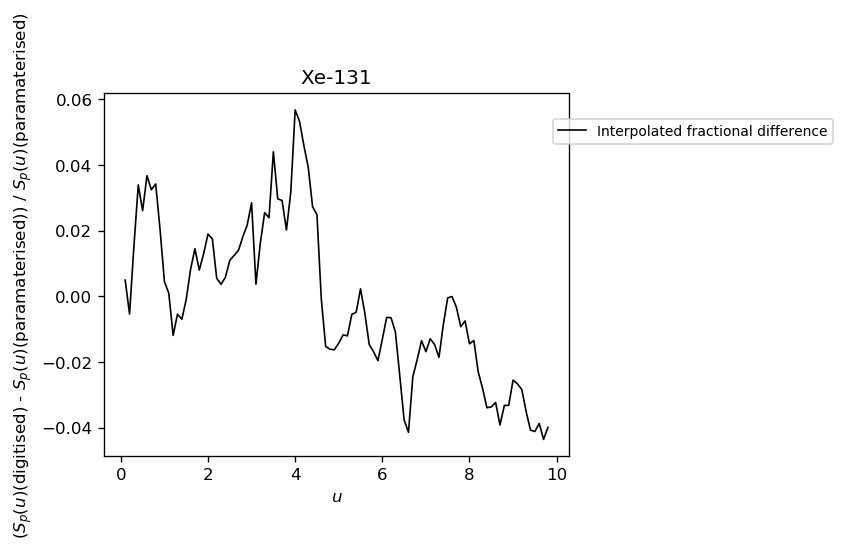

In [10]:
Sfn_p_131_interp_paper = 0.5 * (Sfn_p_131_min_paper + Sfn_p_131_max_paper)

Sfn_p_131_interp_data = 0.5 * (Sfn_p_131_min_data(u_eval) + Sfn_p_131_max_data(u_eval))

frac_diff = (Sfn_p_131_interp_data - Sfn_p_131_interp_paper)/Sfn_p_131_interp_paper

fig3 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{p}(u)$(digitised) - $S_{p}(u)$(paramaterised)) / $S_{p}(u)$(paramaterised)')
plt.title('Xe-131')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

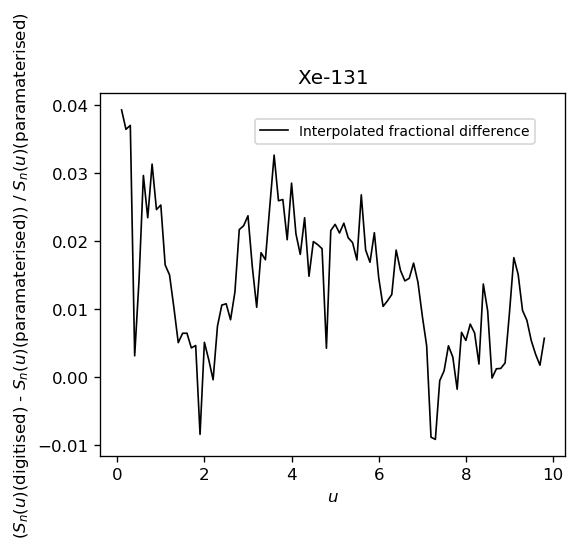

In [11]:
Sfn_n_131_interp_paper = 0.5 * (Sfn_n_131_min_paper + Sfn_n_131_max_paper)

Sfn_n_131_interp_data = 0.5 * (Sfn_n_131_min_data(u_eval) + Sfn_n_131_max_data(u_eval))

frac_diff = (Sfn_n_131_interp_data - Sfn_n_131_interp_paper)/Sfn_n_131_interp_paper

fig4 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{n}(u)$(digitised) - $S_{n}(u)$(paramaterised)) / $S_{n}(u)$(paramaterised)')
plt.title('Xe-131')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')